In [22]:
# we will clone the github repository containing the YOLO V5 and install the requirements via requirements.txt
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  # install dependencies
!cp yolov5/requirements.txt ./

Cloning into 'yolov5'...
remote: Enumerating objects: 5801, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 5801 (delta 11), reused 20 (delta 7), pack-reused 5770
Receiving objects: 100% (5801/5801), 8.30 MiB | 5.84 MiB/s, done.
Resolving deltas: 100% (3955/3955), done.


# **Object detection with Python**

 we will use **yolo V5** model for detecting cars in the image or by using camera.

In [23]:
# let's start by importing important libraries for this task
import pandas as pd  # for storing and manupulating data
import numpy as np  # for fast calculation and processing of data
import cv2          # for image processing
import torch        # for using deep learning
import os           # to use file system
import time         # to record time
import random       # to get random numbers
from tqdm.auto import tqdm  #to get progress bar while running script
import shutil as sh  # for working with files

In [24]:
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt        # for visualization purpose

In [25]:
#  import the data and add some column for the center, height and width and rename the image column to image_id
img_h, img_w, num_channels = (380, 676, 3)
df = pd.read_csv('../input/car-object-detection/data/train_solution_bounding_boxes (1).csv')
df.rename(columns={'image':'image_id'}, inplace=True)
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])
df['x_center'] = (df['xmin'] + df['xmax'])/2
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [26]:
# we will read a random image from the image_id column
index = list(set(df.image_id))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'/kaggle/input/car-object-detection/data/training_images/{image}.jpg')
img.shape

Image ID: vid_4_9060


(380, 676, 3)

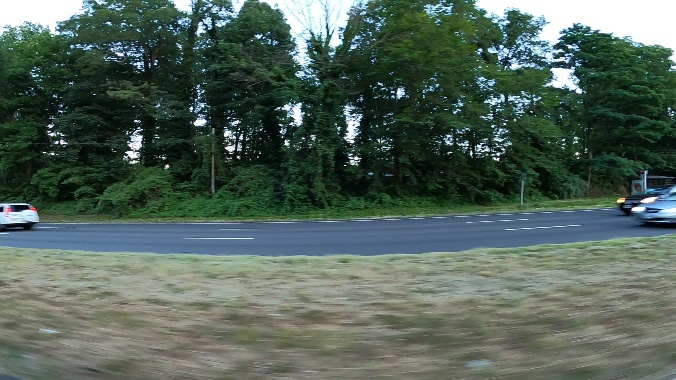

In [27]:
# show the random image
image = random.choice(index)
Image(filename=f'/kaggle/input/car-object-detection/data/training_images/{image}.jpg',width=600)

In [28]:
# we will copy the data to other directory
source = 'training_images'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('/tmp/convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('/tmp/convertor/fold{}/labels/'.format(fold)+path2save)
            with open('/tmp/convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('/tmp/convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('/tmp/convertor/fold{}/images/{}'.format(fold,path2save))
            sh.copy("/kaggle/input/car-object-detection/data/{}/{}.jpg".format(source,name),'/tmp/convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

  0%|          | 0/355 [00:00<?, ?it/s]

# **detecting the cars from the images by using the predict file in github repository**

In [29]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source /kaggle/input/car-object-detection/data/testing_images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=676, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/kaggle/input/car-object-detection/data/testing_images', update=False, view_img=False, weights=['yolov5/yolov5s.pt'])
100%|██████████████████████████████████████| 14.1M/14.1M [00:00<00:00, 27.8MB/s]

Fusing layers... 
image 1/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25100.jpg: 416x704 Done. (0.303s)
image 2/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25120.jpg: 416x704 Done. (0.293s)
image 3/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25140.jpg: 416x704 Done. (0.258s)
image 4/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25160.jpg: 416x704 Done. (0.230s)
image 5/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25180.jpg: 416x704 Done. (0.267s)
image 6/

In [30]:
# we will save the prediction to predicted_files list
predicted_files = []
for (dirpath, dirnames, filenames) in os.walk("runs/detect/exp"):
    predicted_files.extend(filenames)

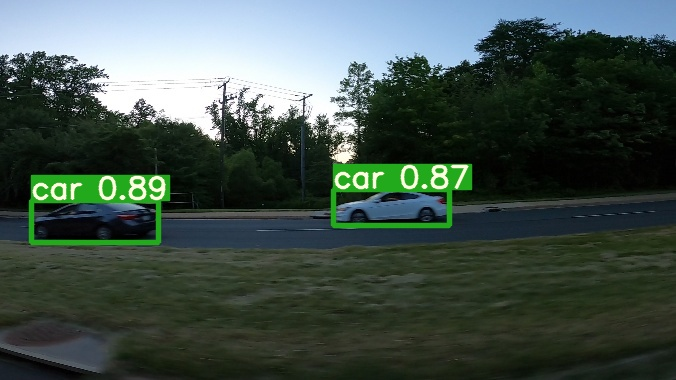

In [31]:
# we will randomly see the predicted images with bounding box around the car
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

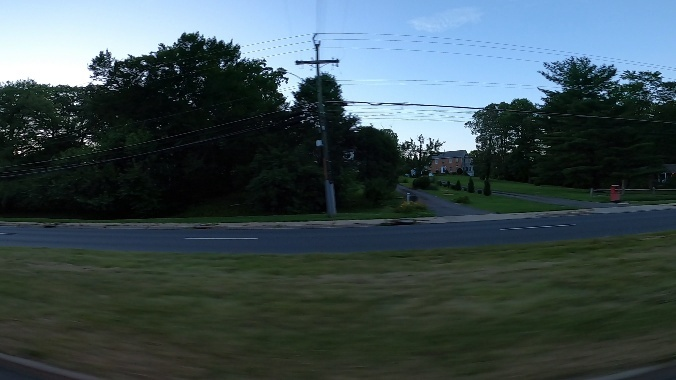

In [15]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

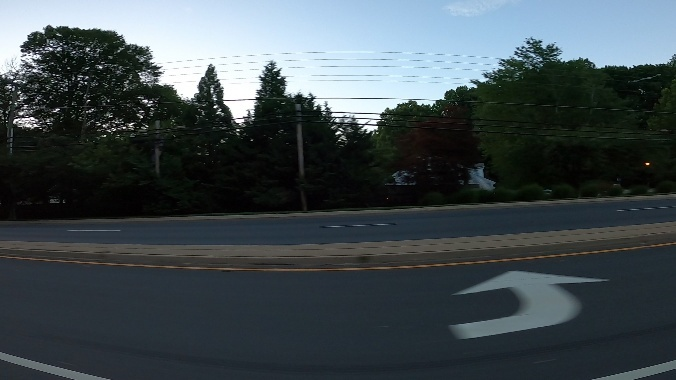

In [16]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

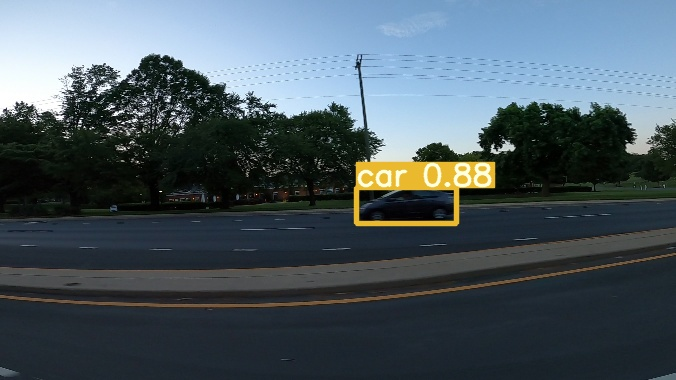

In [17]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

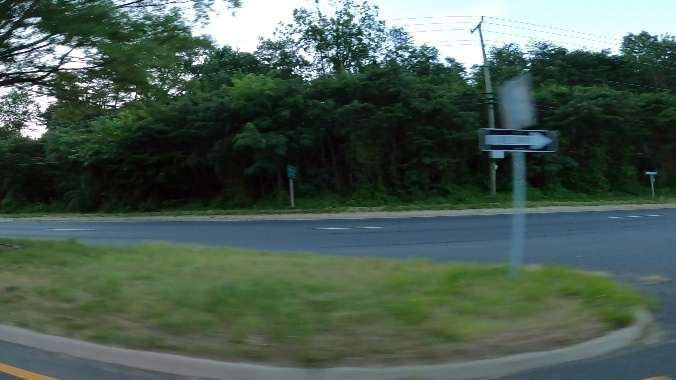

In [18]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

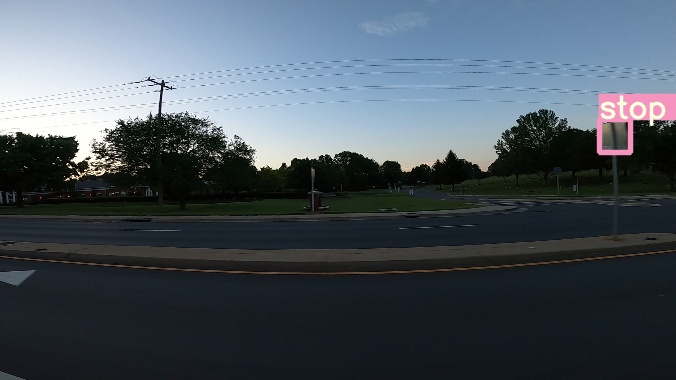

In [19]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

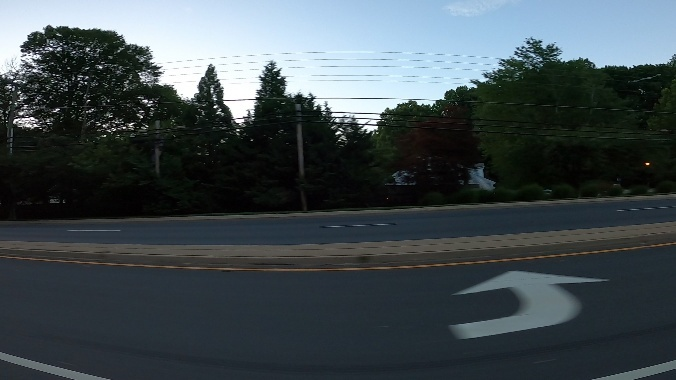

In [20]:
Image(filename=f'runs/detect/exp/{random.choice(predicted_files)}')

In [21]:
!rm -rf runs yolov5